# importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import chisquare
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Dataset Load

In [2]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

matplotlib.style.use('classic')
data_frame = pd.read_csv('pima-data.csv')
data_frame.shape

(768, 10)

In [3]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006


In [4]:
data_frame.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True


In [5]:
data_frame.tail(4)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


# checking for null data

In [7]:
data_frame.isnull()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [8]:
data_frame.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
data_frame.isnull().values.any()

False

In [10]:
#print(data_frame["diabetes"].value_counts())
#(data_frame["diabetes"].value_counts() * 100) / 768      #total row 768 

num_true = len(data_frame.loc[data_frame['diabetes'] == True])
num_false = len(data_frame.loc[data_frame['diabetes'] == False])
print ("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_true / (num_true + num_false)) * 100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (34.90%)


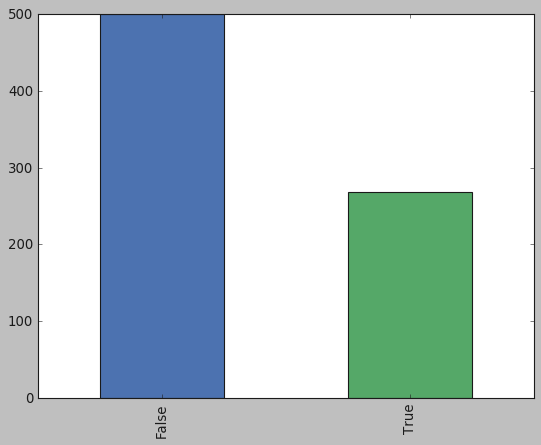

In [11]:
data_frame["diabetes"].value_counts().plot.bar()

# Age Distribution

In [12]:
print("Min Age: ", data_frame["age"].min())
print("Max Age: ", data_frame["age"].max())

Min Age:  21
Max Age:  81


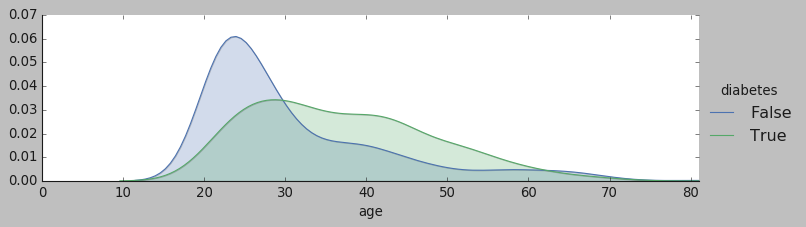

In [14]:
facet = sns.FacetGrid(data_frame, hue = "diabetes", aspect = 3)
facet.map(sns.kdeplot,"age",shade= True)
facet.set(xlim=(0, data_frame["age"].max()))
facet.add_legend()

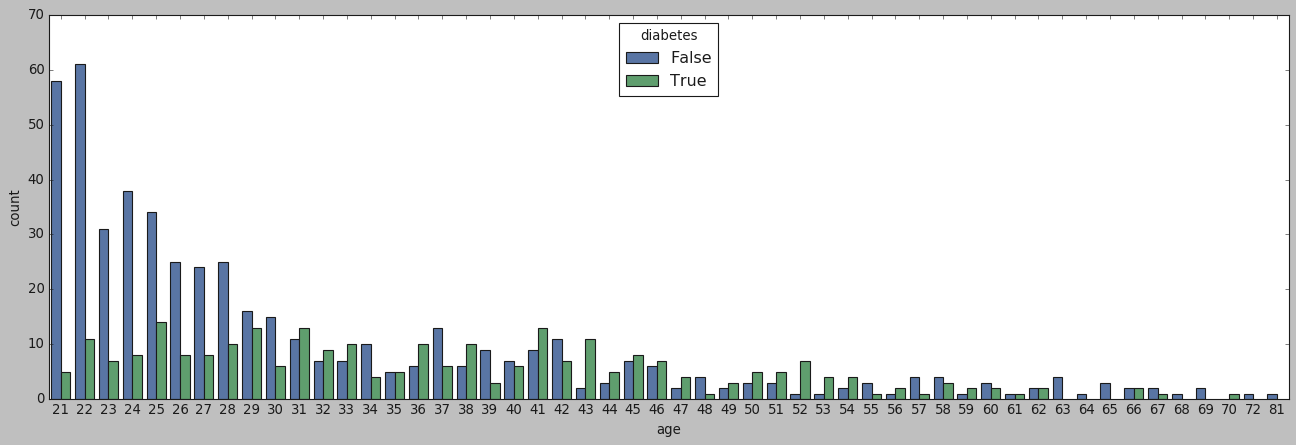

In [15]:
plt.figure(figsize=(20, 6))
sns.countplot(data = data_frame, x = "age", hue = "diabetes")

# glucose_conc analysis

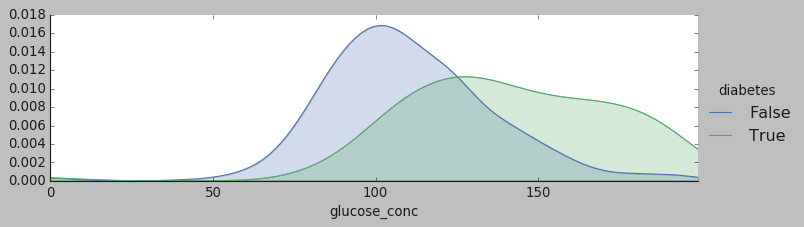

In [16]:
facet = sns.FacetGrid(data_frame, hue = "diabetes", aspect = 3)
facet.map(sns.kdeplot,"glucose_conc",shade= True)
facet.set(xlim=(0, data_frame["glucose_conc"].max()))
facet.add_legend()

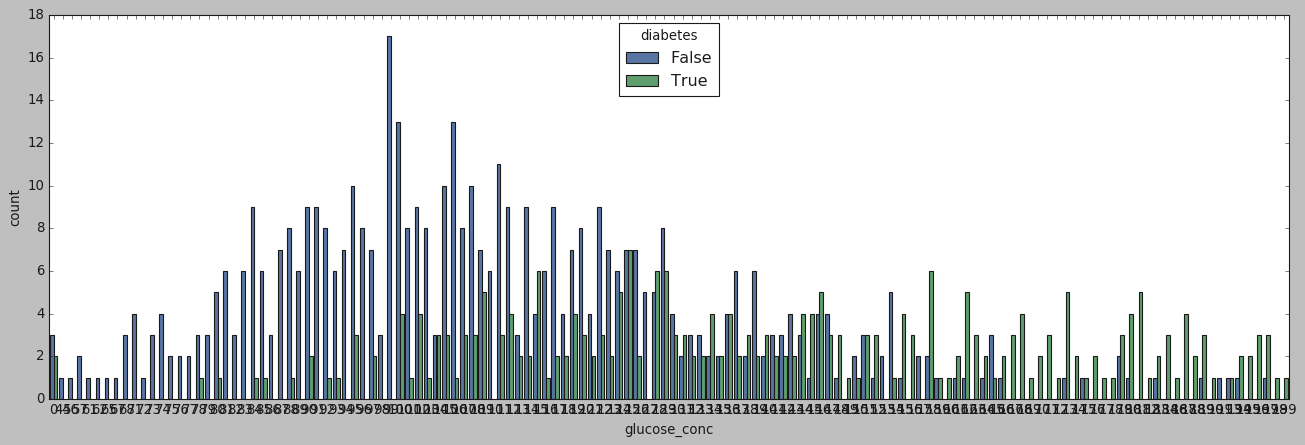

In [17]:
plt.figure(figsize=(20, 6))
sns.countplot(data = data_frame, x = "glucose_conc", hue = "diabetes")

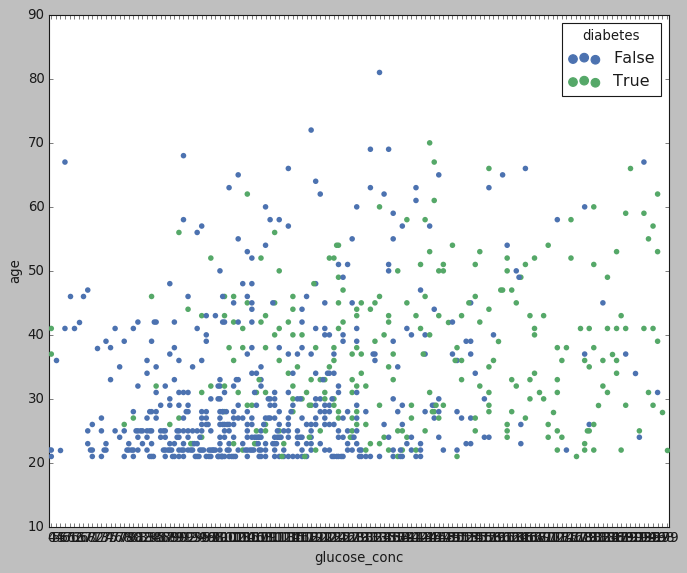

In [18]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x = 'glucose_conc',y = "age", hue="diabetes", data = data_frame)

# HeatMap generation

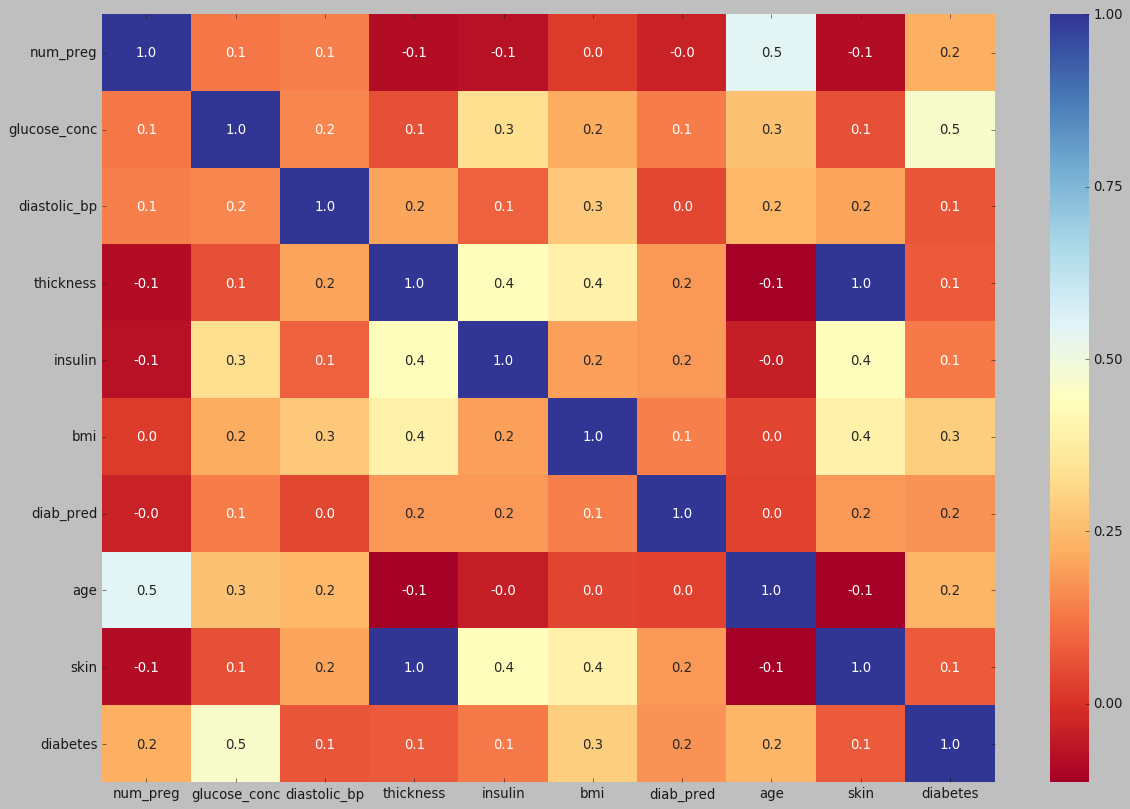

In [19]:
plt.figure(figsize=(18, 12))
sns.heatmap(data_frame.corr(), cmap="RdYlBu", annot=True, fmt=".1f")

# Deleted highly correlated column

In [20]:
# Deleting 'thikness' column completely
del data_frame['thickness']
# Checking if the action was successful or not
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


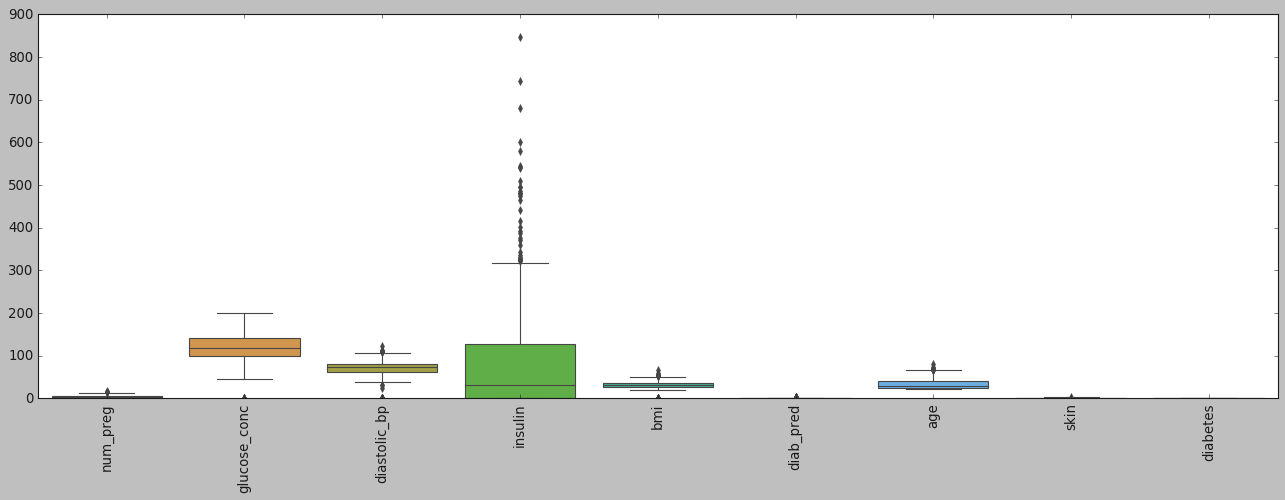

In [21]:
plt.figure(figsize=(20, 6))
sns.boxplot(data = data_frame)
plt.xticks(rotation=90)
plt.show()

# Level Encoding - Datatype changing

In [22]:
# Mapping the values
map_diabetes = {True : 1, False : 0}

# Setting the map to the data_frame
data_frame['diabetes'] = data_frame['diabetes'].map(map_diabetes)

# Let's see what we have done
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


# Chi-Square Test

In [23]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])
for i in range(len(data_frame.columns)):
    chi2, p = chisquare(data_frame[data_frame.columns[i]])
    result = result.append([pd.Series([data_frame.columns[i], chi2], index = result.columns)], ignore_index=True)

In [24]:
pd.set_option("max_column", None)
result = result.sort_values(by="Chi2Weights", ascending=False)
result

,Features,Chi2Weights
3,insulin,127653.278269
1,glucose_conc,6485.524605
2,diastolic_bp,4158.201402
6,age,3191.203690
0,num_preg,2264.874704
4,bmi,1490.242753
8,diabetes,500.000000
7,skin,374.462356
5,diab_pred,178.437050


In [25]:
print(format(result.Chi2Weights), '.0f')

3    127653.278269
1      6485.524605
2      4158.201402
6      3191.203690
0      2264.874704
4      1490.242753
8       500.000000
7       374.462356
5       178.437050
Name: Chi2Weights, dtype: float64 .0f


# Training, Test Data Preparing

In [26]:
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class_name = ['diabetes']

# Getting feature variable values
X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.30

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [27]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

69.92% in training set
30.08% in test set


In [28]:
#how many column have 0 value 
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['skin'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0
# rows missing thickness: 227


In [29]:
#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Create and Train Model (GaussianNB)

In [30]:
# create GaussianNBr model object and train it with the data
from sklearn.naive_bayes import GaussianNB
nb_model= GaussianNB()
nb_model.fit(X_train, y_train.ravel())  # ravel() return 1-D array

GaussianNB(priors=None, var_smoothing=1e-09)

# Performance on Training data

In [31]:
# performance metrics library
from sklearn import metrics

# get current accuracy of the model
prediction_from_trained_data = nb_model.predict(X_train)

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our GaussianNB model is : {0:.4f}".format(accuracy))

Accuracy of our GaussianNB model is : 0.7542


# Performance on Testing Data

In [32]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our GaussianNB model is: {0:0.4f}".format(accuracy))

Accuracy of our GaussianNB model is: 0.7359


# Confusion Matrix

In [50]:
print ("Accuracy of our GaussianNB model is: {0:0.4f} %".format(accuracy))

print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Accuracy of our GaussianNB model is: 0.7359 %
Confusion Matrix
[[ 52  28]
 [ 33 118]]
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Performance Training

In [52]:
rf_predict_train = rf_model.predict(X_train)

rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9832


# Performance Testing 

In [53]:
rf_predict_test = rf_model.predict(X_test)

rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7229


In [54]:
print ("Confusion Matrix for Random Forest")
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 48  32]
 [ 32 119]]

Classification Report

              precision    recall  f1-score   support

           1       0.60      0.60      0.60        80
           0       0.79      0.79      0.79       151

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



# KNN Model Classification

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
knn_predict_train = knn_model.predict(X_train)
knn_accuracy = metrics.accuracy_score(y_train, knn_predict_train)
print ("Accuracy: {0:.4f}".format(knn_accuracy))

Accuracy: 0.8045


In [57]:
knn_predict_test = knn_model.predict(X_test)
knn_accuracy_testdata = metrics.accuracy_score(y_test, knn_predict_test)
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))
print ("Confusion Matrix for K-Neighbors Classifier")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, knn_predict_test, labels=[1, 0])))

Accuracy: 0.7359
Confusion Matrix for K-Neighbors Classifier
[[ 51  29]
 [ 32 119]]

Classification Report

              precision    recall  f1-score   support

           1       0.61      0.64      0.63        80
           0       0.80      0.79      0.80       151

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Finding the best value of K in KNN using N-Fold Cross Validation

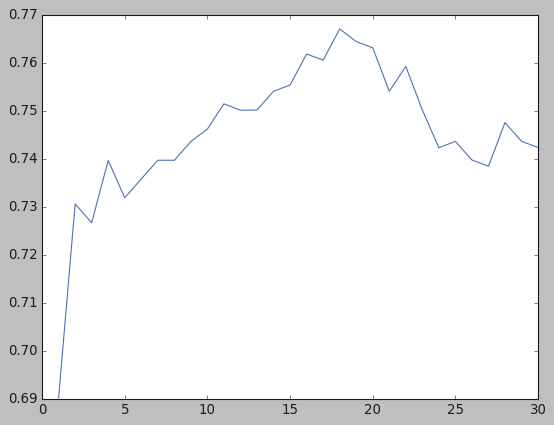

KNN with N-Fold Cross Validation is giving best score as 76.70027341079972% for K=18


In [58]:
k_range=np.arange(1,31,1)
k_score=[]
best_accuracy_score_knn=0
best_k=0
for k in k_range:
    score=cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y.ravel(), cv=10, scoring='accuracy').mean()
    k_score.append(score)
    if best_accuracy_score_knn<score:
        best_accuracy_score_knn=score
        best_k=k
knn_plot=plt
knn_plot.plot(k_range, k_score)
knn_plot.show()
print(f"KNN with N-Fold Cross Validation is giving best score as {best_accuracy_score_knn*100}% for K={best_k}")

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')

lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
lr_predict_test = lr_model.predict(X_test)

lr_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)
print ("Accuracy: {0:.4f}".format(lr_accuracy_testdata))
print ("Confusion Matrix for Logistic Regressiont")
print ("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
print ("{0}".format(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0])))

Accuracy: 0.7229
Confusion Matrix for Logistic Regressiont
[[ 47  33]
 [ 27 124]]

Classification Report

              precision    recall  f1-score   support

           1       0.64      0.59      0.61        80
           0       0.79      0.82      0.81       151

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



# ROC Curve

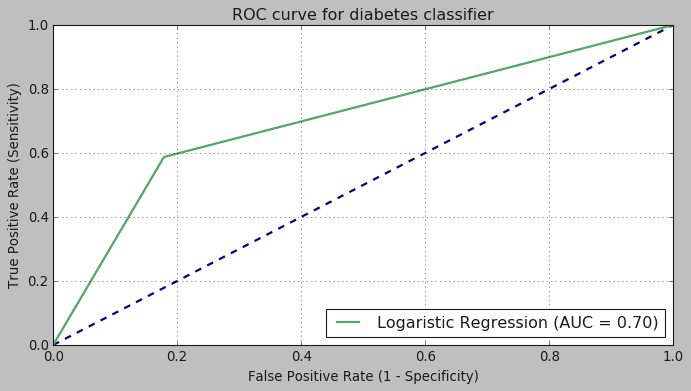

In [61]:
FPR, TPR, thresholds = roc_curve(y_test, lr_predict_test)

plt.figure(figsize=(10,5))  # figsize in inches
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 50%  
plt.plot(FPR, TPR, lw=2, label='Logaristic Regression (AUC = %0.2f)' % auc(FPR, TPR))
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")

# N-Fold Cross-validation

In [62]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  
lr_cv_model.fit(X_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(X_test)

print ("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print (" ")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.7013
[[ 53  27]
 [ 42 109]]
 
Classification Report
              precision    recall  f1-score   support

           1       0.56      0.66      0.61        80
           0       0.80      0.72      0.76       151

   micro avg       0.70      0.70      0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



# C (Regularization Hyperparameter)

1st max value of best_recall_score: 0.613 occured at C=1.300


Text(0, 0.5, 'recall score')

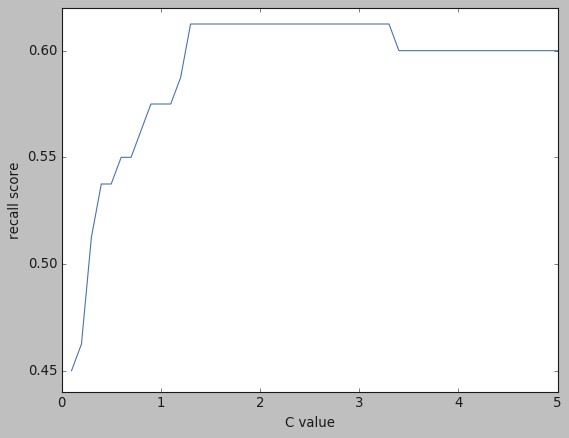

In [63]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start

best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)

    lr_model_loop = LogisticRegression(C=C_val, random_state=42)

    lr_model_loop.fit(X_train, y_train.ravel())

    lr_predict_loop_test = lr_model_loop.predict(X_test)

    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)

    recall_scores.append(recall_score)

    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print ("1st max value of best_recall_score: {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

# class_weight = 'balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

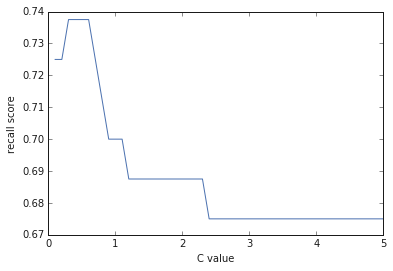

In [64]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)

    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)

    lr_model_loop.fit(X_train, y_train.ravel())

    lr_predict_loop_test = lr_model_loop.predict(X_test)

    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)

    recall_scores.append(recall_score)

    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print ("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")